# Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score

from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import  to_categorical
from keras.callbacks import ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier


# Ignorar Avisos desnecessários
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

## Confere se temos GPU instalada

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
#print(tf.config.experimental.list_physical_devices())

Num GPUs Available:  1


## Funções Auxiliares

In [3]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Accuracy')
    plt.plot(x, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and validation Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

# Análise dos Dados

## Carregando a base de dados

In [4]:
iris = datasets.load_iris()

In [5]:
df = px.data.iris()
fig = px.scatter_matrix(df, dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"], color="species")
fig.update_traces(diagonal_visible=False, showupperhalf=False)
fig.update_layout(title='Iris Data set', width=1000, height=600)
fig.show()

In [6]:
features = iris.feature_names
X = iris.data
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
X.shape

(150, 4)

In [8]:
classes = iris.target_names
y = iris.target
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
y.shape

(150,)

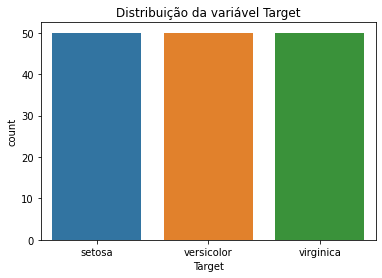

In [9]:
sns.countplot(y)
plt.title('Distribuição da variável Target')
plt.xlabel('Target')
plt.xticks(ticks=range(0,3), labels=classes)
plt.show()

## Padronizando os dados com o MinMaxScaler do SKlearn. 
### Dados padronizados entre 0 e 1.

In [11]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

### Dividindo a Base de Dados entre Treino e Teste, com 20% para os testes.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape

(120, 4)

In [14]:
y_train.shape

(120,)

## Transformando a variável de resposta em "One-hot vector" para utilizá-la no modelo de MLP

In [16]:
num_features = X.shape[1]
num_classes = len(np.unique(y)) # y.shape[1]
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
y_train[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [18]:
y_train.shape

(120, 3)

# Modelo de MLP

## Criando o modelo

In [64]:
model = Sequential()
model.add(Dense(8, input_dim=num_features, activation='relu'))
model.add(Dense(num_classes , activation='softmax'))
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________
None


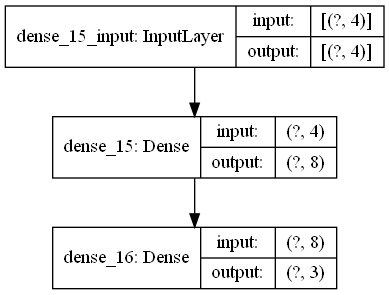

In [65]:
plot_model(model, show_shapes=True, show_layer_names=True)

## Compilando e treinando o modelo. 
### Vamos utilizar a função de Callback ModelCheckPointer para salvar o modelo com a melhor accuracia na base de validação (que é a mesma de teste final pois temos uma base muito pequena)

In [66]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [67]:
%%time
checkpointer = ModelCheckpoint(filepath='./modelo_mlp_ex3_1.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy')

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=8, callbacks=[checkpointer])

Epoch 1/150
 1/15 [=>............................] - ETA: 0s - loss: 1.0621 - accuracy: 0.6250WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_train_batch_end` time: 0.0010s). Check your callbacks.

Epoch 00001: val_accuracy improved from -inf to 0.70000, saving model to .\modelo_mlp_ex3_1.hdf5
15/15 [==============================] - 0s 18ms/step - loss: 0.9319 - accuracy: 0.6500 - val_loss: 0.8695 - val_accuracy: 0.7000
Epoch 2/150
 1/15 [=>............................] - ETA: 0s - loss: 0.9086 - accuracy: 0.7500
Epoch 00002: val_accuracy did not improve from 0.70000
15/15 [==============================] - 0s 3ms/step - loss: 0.9041 - accuracy: 0.6500 - val_loss: 0.8489 - val_accuracy: 0.7000
Epoch 3/150
 1/15 [=>............................] - ETA: 0s - loss: 0.7126 - accuracy: 0.8750
Epoch 00003: val_accuracy did not improve from 0.70000
15/15 [==============================] - 0s 3ms/step - loss: 0.8822 - accu

## Gráfico comparativo de Acurácia e Perda no treinamento

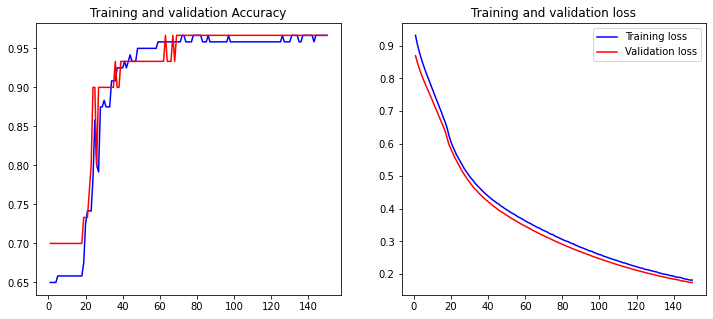

In [68]:
plot_history(history)

## Carregando o melhor modelo salvo e apresentando a acurácia do Treino e do Teste

In [69]:
model = load_model("./modelo_mlp_ex3_1.hdf5")

In [70]:
scores = model.evaluate(X_train, y_train)
print()
print(f"Acuracia do Treino: {round(scores[1]*100,2)}%")

4/4 [==============================] - 0s 1ms/step - loss: 0.3520 - accuracy: 0.9583

Acuracia do Treino: 95.83%


In [71]:
scores = model.evaluate(X_test, y_test)
print()
print(f"Acuracia da Validação: {round(scores[1]*100,2)}%")

1/1 [==============================] - 0s 1000us/step - loss: 0.3380 - accuracy: 0.9667

Acuracia da Validação: 96.67%


## Conferindo o modelo final com uma Validação Cruzada (Cross Validation) usando 10 amostras. Neste caso vamos usar toda a base de dados.

In [72]:
def create_model():
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(3 , activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model
    

In [73]:
estimator = KerasClassifier(build_fn=create_model, epochs=150, batch_size=8, verbose=0)
y = to_categorical(y)
scores = cross_val_score(estimator, X, y, cv=10, n_jobs=1)
print()
print("Accuracy : {:0.2f} (+/- {:0.2f})".format(scores.mean(), scores.std()))


Accuracy : 0.93 (+/- 0.07)
